In [1]:
#pip install fbprophet

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np
from fbprophet.plot import add_changepoints_to_plot

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df[['ds', 'y']] = df[['Date', 'Adj Close']] 

In [6]:
df = df[['ds', 'y']] 
df.head(5)

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [7]:
df.tail(5)

,ds,y
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007
2415,2020-02-03,780.000000


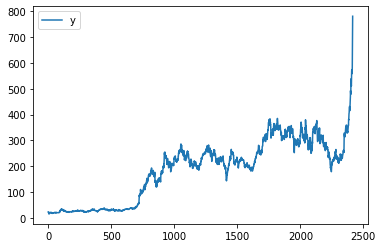

In [8]:
df.plot()

In [28]:
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy() 
df_test = df.loc[df.ds > split_date].copy()

In [29]:
import fbprophet as fbp
model = fbp.Prophet()

In [30]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
forecast = model.predict(df_test) 
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
131,2020-01-28,236.375261,197.021786,262.095493,219.209734,253.296619,-5.495265,-5.495265,-5.495265,-0.702829,-0.702829,-0.702829,-4.792436,-4.792436,-4.792436,0.0,0.0,0.0,230.879996
132,2020-01-29,236.243923,194.658337,265.385393,218.969700,253.266034,-5.699262,-5.699262,-5.699262,-0.631272,-0.631272,-0.631272,-5.067990,-5.067990,-5.067990,0.0,0.0,0.0,230.544661
133,2020-01-30,236.112584,195.534605,261.404832,218.729665,253.235448,-6.052585,-6.052585,-6.052585,-0.711964,-0.711964,-0.711964,-5.340622,-5.340622,-5.340622,0.0,0.0,0.0,230.059999
134,2020-01-31,235.981246,197.599445,260.774760,218.489631,253.204863,-6.839918,-6.839918,-6.839918,-1.236908,-1.236908,-1.236908,-5.603010,-5.603010,-5.603010,0.0,0.0,0.0,229.141328
135,2020-02-03,235.587230,194.787522,265.589122,217.769527,253.113106,-7.061861,-7.061861,-7.061861,-0.803747,-0.803747,-0.803747,-6.258114,-6.258114,-6.258114,0.0,0.0,0.0,228.525369


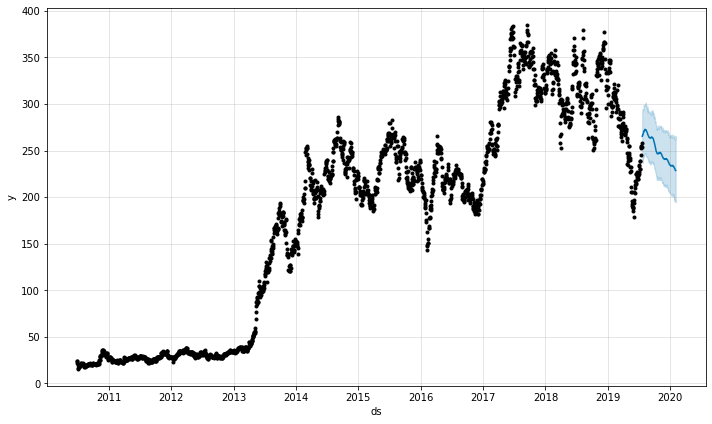

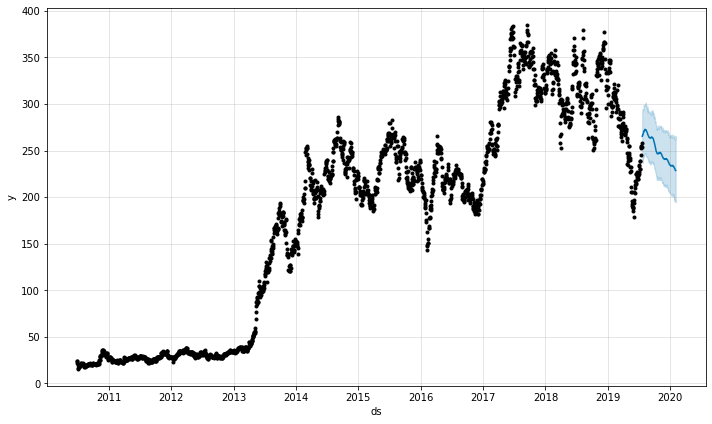

In [32]:
model.plot(forecast)

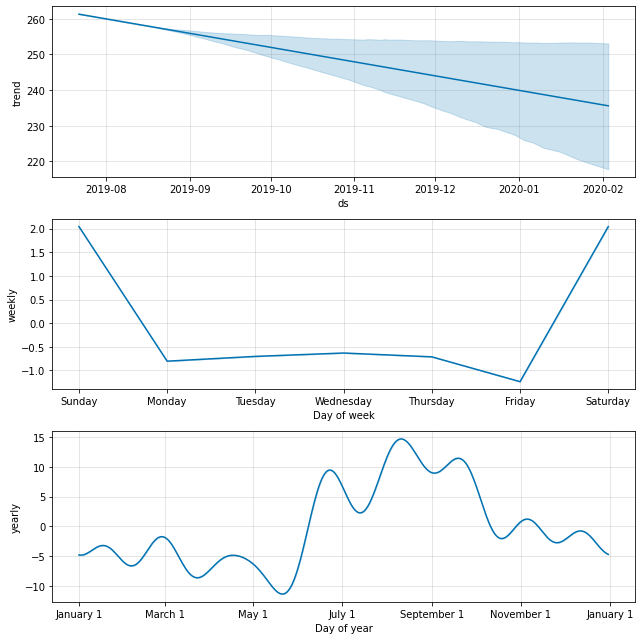

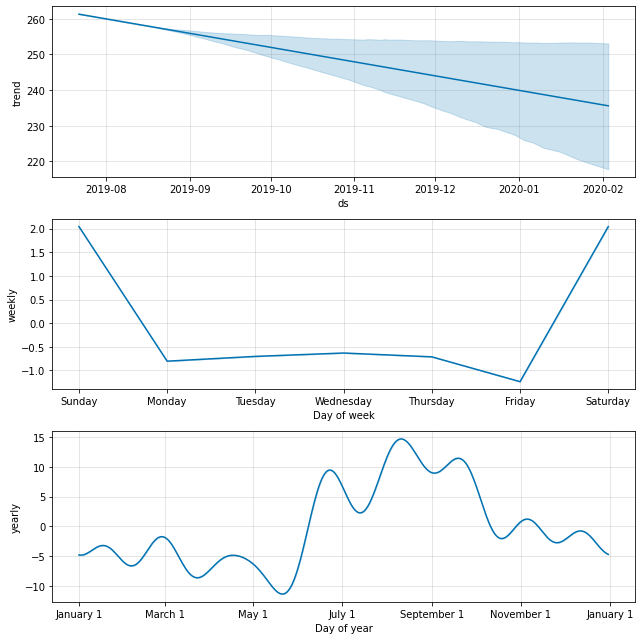

In [33]:
model.plot_components(forecast)

In [34]:
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'])) 
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 21524.699415382034
Mean Absolute Error (MAE): 101.82944136584571


In [35]:
def mean_abs_perc_err(y_true, y_pred):  
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  25.687029389085453


In [36]:
future_dates = model.make_future_dataframe(periods=385)

In [37]:
forecast = model.predict(future_dates) 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
2660,2020-08-03,223.767296,174.922138,280.241034,211.683604,165.886822,262.717246
2661,2020-08-04,224.180639,169.083127,286.155921,211.552265,165.521142,262.988308
2662,2020-08-05,224.504599,170.551043,286.236983,211.420927,165.155462,263.259371
2663,2020-08-06,224.612930,172.116350,283.278064,211.289588,164.799625,263.530433
2664,2020-08-07,224.211277,168.445641,282.420393,211.158249,164.505915,263.745378


The below image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data

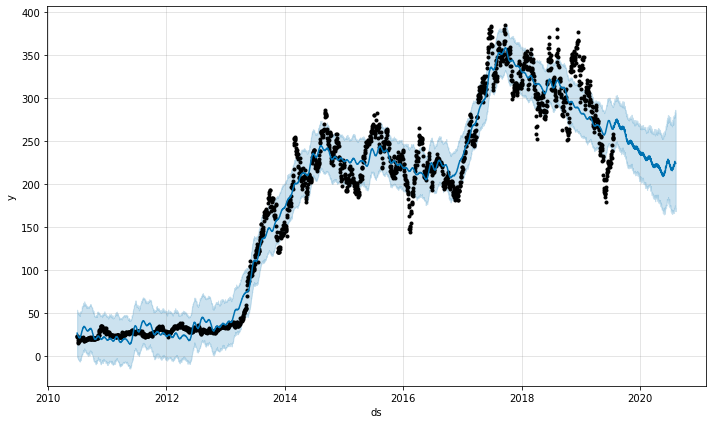

In [38]:
fig1 = model.plot(forecast)

The below images shows the trends and seasonality(in a year) of the time series data. We can see there is an increasing trend, meaning the number of air passengers has increased over time.

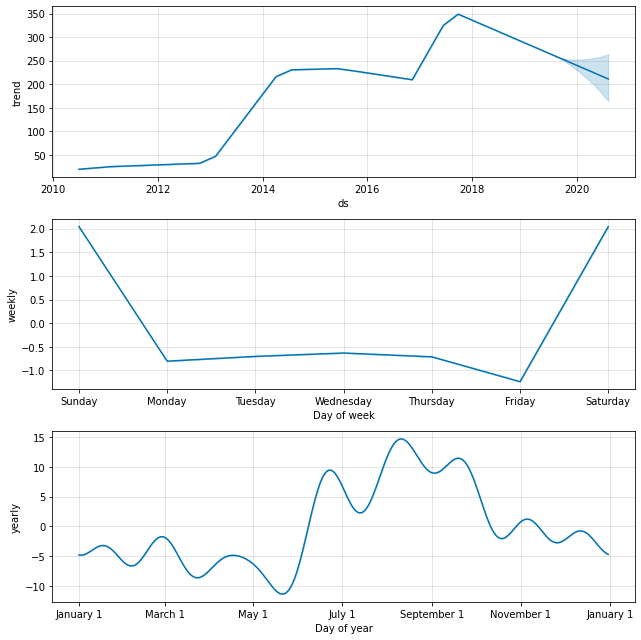

In [39]:
fig2 = model.plot_components(forecast) 

Add changepoints to indicate the time in rapid trend growths. The dotted red lines show the time when there was a rapid change in the trend of the tesla.

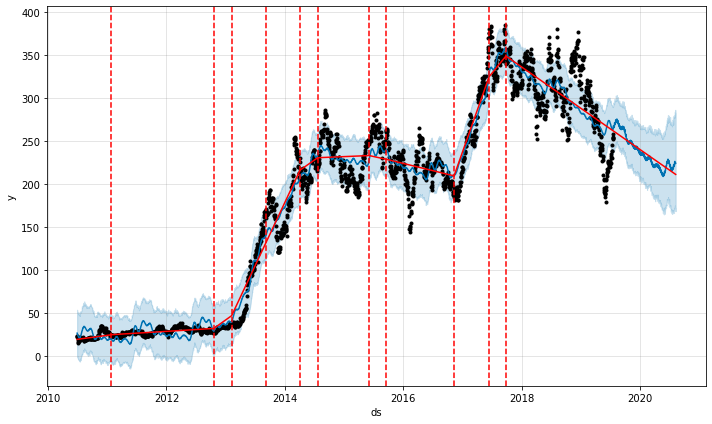

In [40]:
fig = model.plot(forecast) 
a = add_changepoints_to_plot(fig.gca(), model, forecast)

Thank You